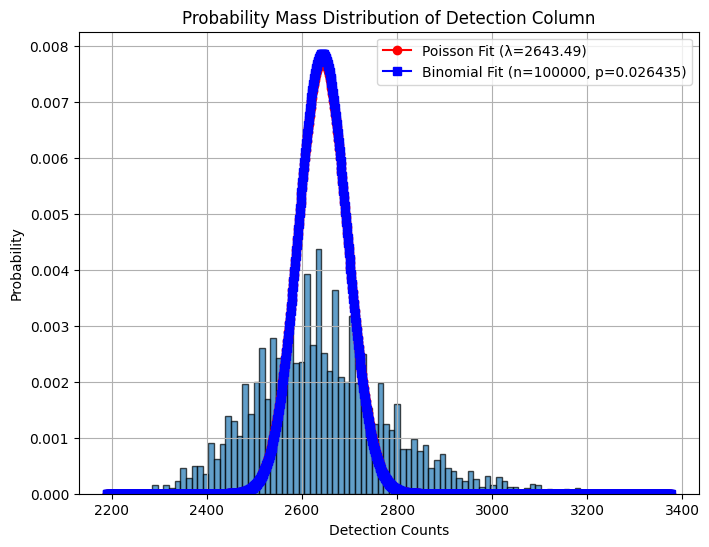

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson, binom

# Define the file path
file_path = "DIVYA.csv"

# Read the CSV file starting from row 18 (0-based index, so use skiprows=17)
df = pd.read_csv(file_path, sep=';', skiprows=17)

# Create a histogram of the Detection column
plt.figure(figsize=(8, 6))
plt.hist(df['Detection'], bins=100, edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Detection Counts')
plt.ylabel('Probability')
plt.title('Probability Mass Distribution of Detection Column')
plt.grid(True)

# Fit a Poisson distribution
mean_detection = np.mean(df['Detection'])
x = np.arange(min(df['Detection']), max(df['Detection']) + 1)
poisson_pdf = poisson.pmf(x, mean_detection)

# Fit a Binomial distribution with 10000 trials (n)
n = 100000
p = mean_detection / n  # Probability for binomial fit
binomial_pdf = binom.pmf(x, n, p)

# Plot the fitted Poisson and Binomial distributions
plt.plot(x, poisson_pdf, 'r-', marker='o', label=f'Poisson Fit (λ={mean_detection:.2f})')
plt.plot(x, binomial_pdf, 'b-', marker='s', label=f'Binomial Fit (n={n}, p={p:.6f})')
plt.legend()
plt.show()

